# IBM EDA & Feature Engineering - Project Report

This project is all about Exploratory Descriptive Analysis, Feature Engineering and Hypothesis Testing

## About the Dataset

Dataset - Flight Price Details from [kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

### Features

* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price.

In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from scipy import stats

## Initial plan for Data Exploration

Importing the data and checking the information of the dataset using the ```info()```.

In [181]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


We don't need the unnamed col as it is a repeated feature, auto index will do just fine

In [183]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


First let's clean the dataset, looking for null values and duplicates

In [184]:
df.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

No null values present in our dataset

In [185]:
df.duplicated().any()

False

No duplicate values as well

## Feature Engineering

This dataset contains lot of categorical variables. Machine understands only numerical data, so for that we need to convert the categorical variables into numericals. For that we will be doing encoding. Different types of features required different encodings. 

Here's a list:
* One-Hot Encoding - airline, source_city, destination_city
* Ordinal Encoding - departure_time, arrival_time, stops
* Binary Encoding - class

In [186]:
cols = df[['airline','source_city','destination_city']]
one_hot_encode = pd.get_dummies(cols, drop_first=True).astype(int)
one_hot_encode

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
300149,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
300150,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
300151,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [187]:
df = pd.concat([df.reset_index(drop=True), one_hot_encode], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,...,0,1,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1


In [189]:
'''
departure_time and arrival_time encoding

Early_Morning 0
Morning       1
Afternoon     2
Evening       3
Night         4
Late_Night    5
'''

df = df.replace({'Early_Morning':0,'Morning':1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,3,zero,4,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,0,zero,1,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,0,zero,0,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,1,zero,2,Mumbai,Economy,2.25,1,...,0,1,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,1,zero,1,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1


In [190]:
'''
stops encoding

zero            0
one             1
others          2
'''
df = df.replace({'two_or_more':'other'})
df = df.replace({'zero':0,'one':1,'other':2})
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,...,0,1,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,...,0,1,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,...,0,1,0,0,0,0,0,0,0,1


In [191]:
'''
class encoding 

Economy     0
Business    1
'''
df = df.replace({'Economy':0,'Business':1})
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,0,2.17,1,...,0,1,0,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,0,2.33,1,...,0,1,0,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,0,2.17,1,...,0,1,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,0,2.25,1,...,0,1,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,0,2.33,1,...,0,1,0,0,0,0,0,0,0,1


In [192]:
df.drop(columns=['source_city','destination_city','airline','flight'], axis=1, inplace=True)

In [193]:
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,2.33,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,2.17,1,5956,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,0,2.33,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300153 non-null  int64  
 1   stops                       300153 non-null  int64  
 2   arrival_time                300153 non-null  int64  
 3   class                       300153 non-null  int64  
 4   duration                    300153 non-null  float64
 5   days_left                   300153 non-null  int64  
 6   price                       300153 non-null  int64  
 7   airline_Air_India           300153 non-null  int64  
 8   airline_GO_FIRST            300153 non-null  int64  
 9   airline_Indigo              300153 non-null  int64  
 10  airline_SpiceJet            300153 non-null  int64  
 11  airline_Vistara             300153 non-null  int64  
 12  source_city_Chennai         300153 non-null  int64  
 13  source_city_De

<Axes: xlabel='price', ylabel='Count'>

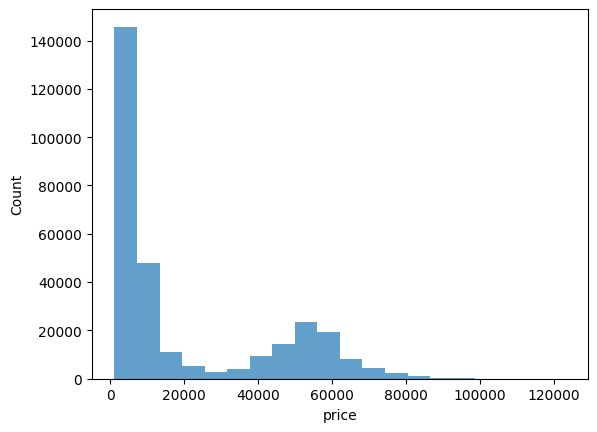

In [195]:
sns.histplot(df['price'], bins=20, alpha=.7, edgecolor=None)

The price feature is not normally distributed. For a linear model, it is assumed that the data is normally distributed, so we will use transformations to normally distribute the feature

<Axes: xlabel='price', ylabel='Density'>

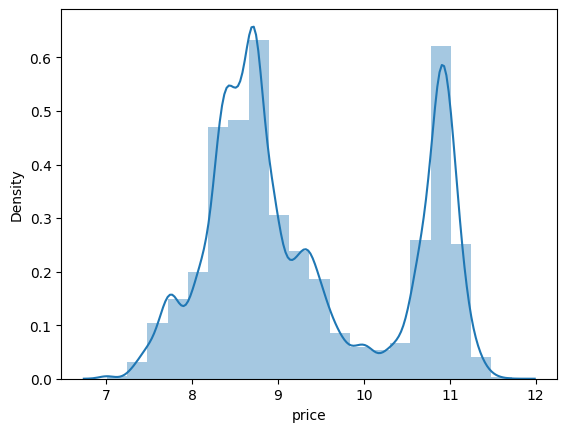

In [196]:
sns.distplot(np.log(df['price']), bins=20)

<Axes: >

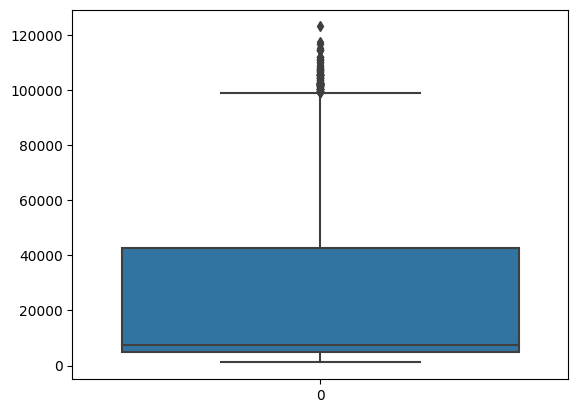

In [197]:
sns.boxplot(df['price'])

In [198]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

I am skipping the outliers as it is causing the data to be not normally distributed.

In [199]:
percentile_99 = df['price'].quantile(0.99)
df = df[abs(df['price']) < percentile_99]
df['price'].describe()

count    297143.000000
mean      20249.663522
std       21888.829438
min        1105.000000
25%        4755.000000
50%        7412.000000
75%       41269.000000
max       76729.000000
Name: price, dtype: float64

<Axes: >

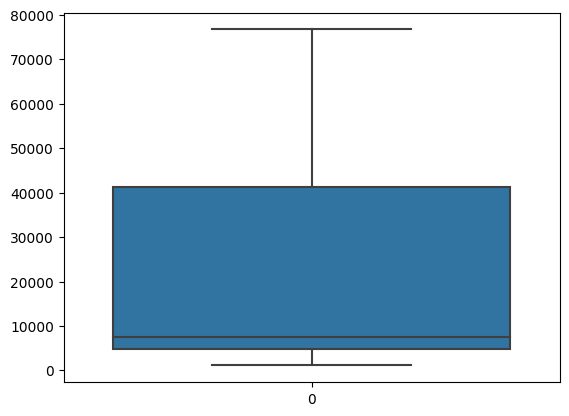

In [200]:
sns.boxplot(df['price'])

Applying the ```boxcox``` transformation to normally distribute the data

<Axes: ylabel='Count'>

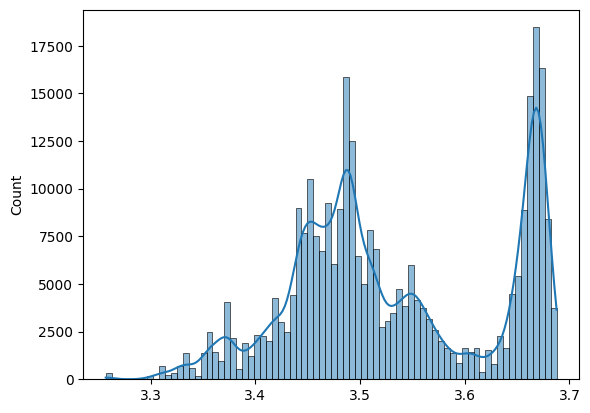

In [201]:
pricing, fitted_lambda = stats.boxcox(df['price'])
sns.histplot(pricing, kde=True)

Checking out the correlations between the features as only the strongly correlated can be selected for further analysis like linear regression or any other classification problem

<function matplotlib.pyplot.show(close=None, block=None)>

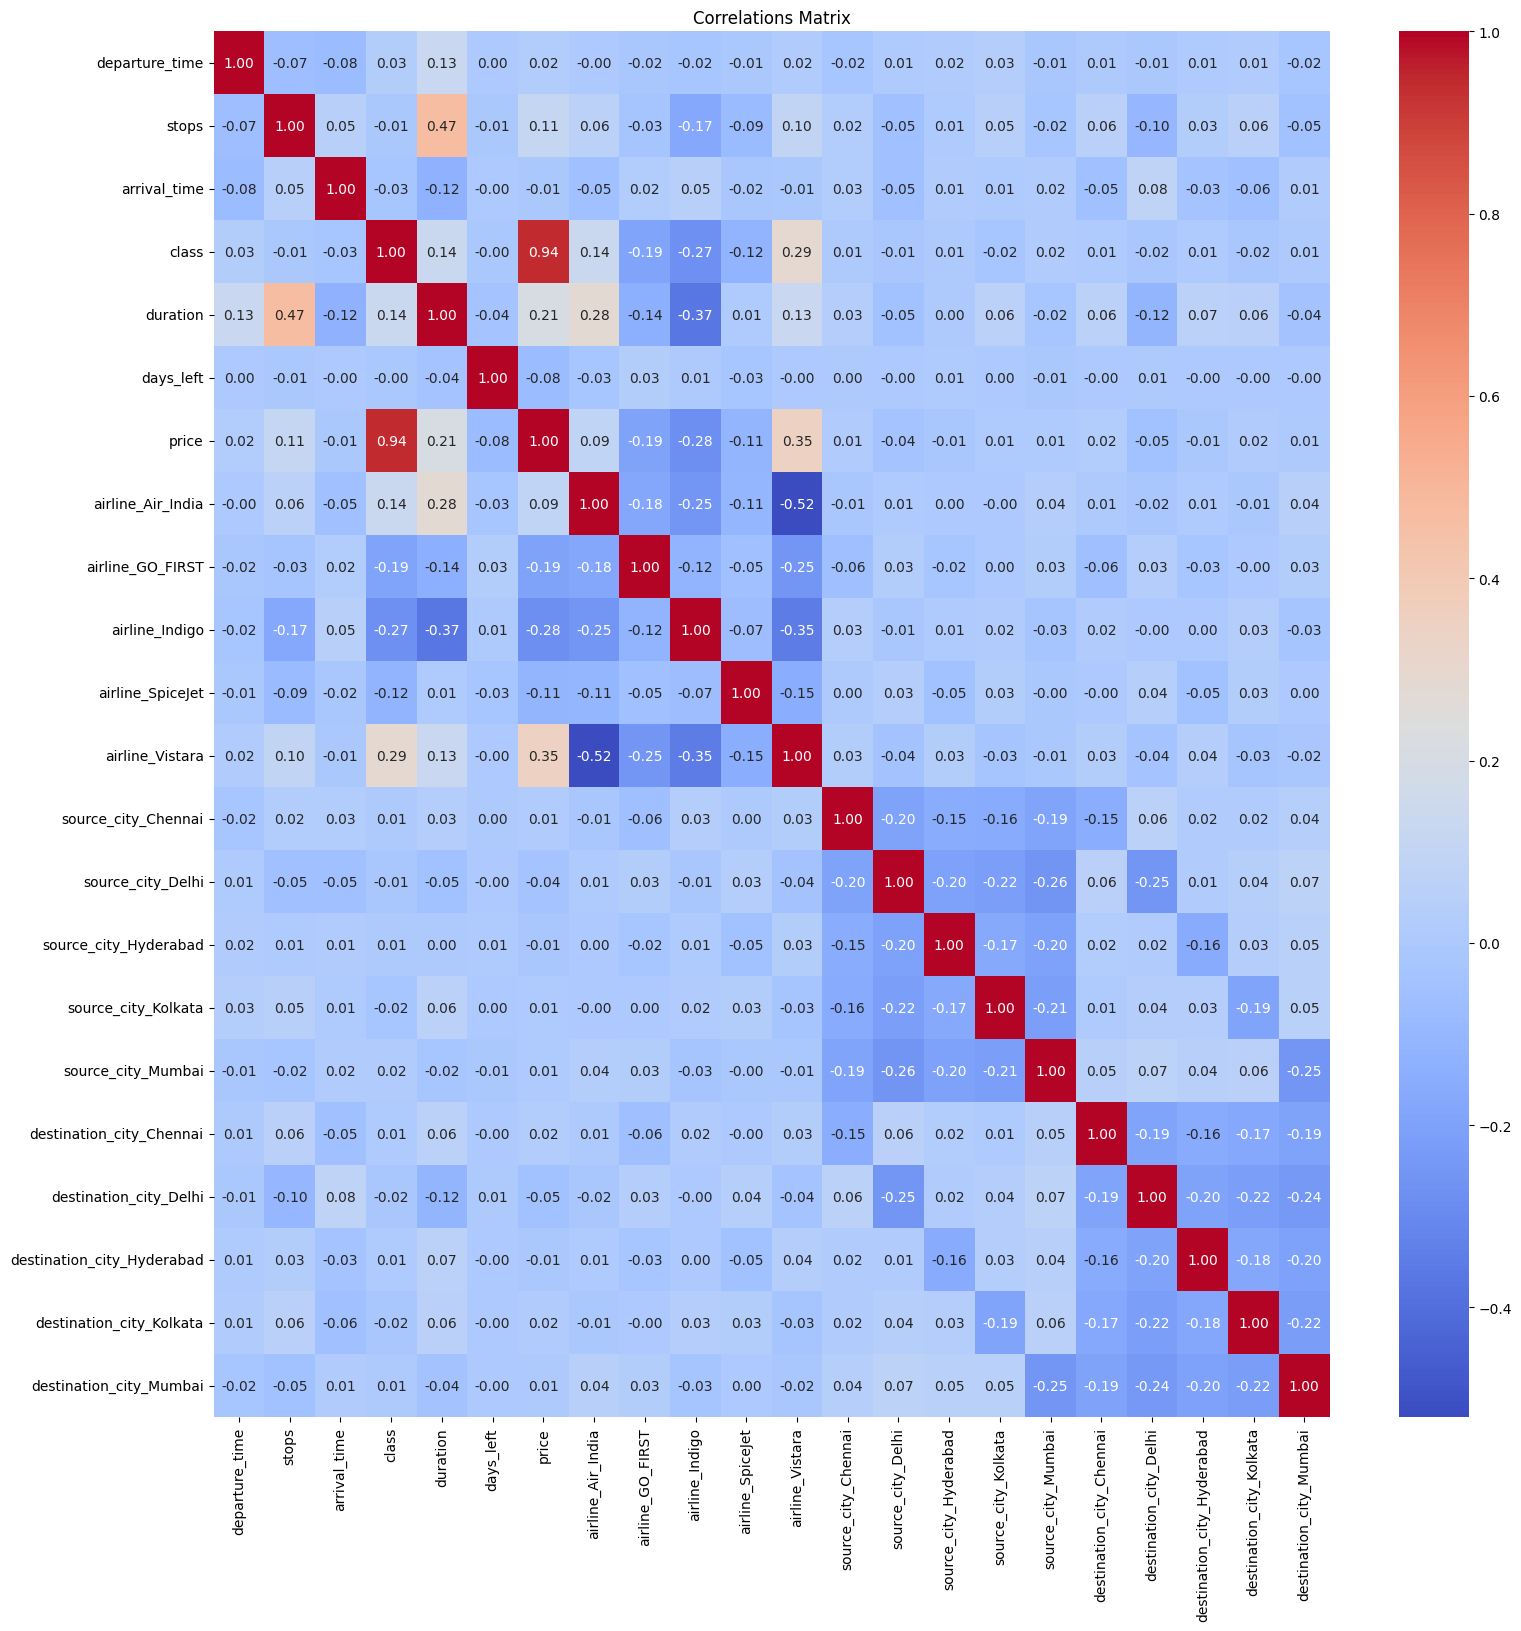

In [202]:
df_corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlations Matrix')
plt.show

Only a very few features are strongly correlated

## Hypothesis Testing

### Hypothesis 1

To prove or disprove there is no difference in mean price of economy and mean price of business

Null Hypothesis: Mean price of economy - Mean price of business = 0

Alternate Hypothesis: Mean price of economy - Mean price of business is not equal to 0

### Hypothesis 2

To prove or disprove the correlation between class and price

Null Hypothesis: No Correlation between class and price

Alternate Hypothesis: There is a Correlation between class and price

### Hypothesis 3

To prove or disprove the average flight duration is 12H

Null Hypothesis: Average flight duration = 12h

Alternate Hypothesis: Average flight duration is not equal to 12h

### Let's test the hypothesis 1

In [203]:
df['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Let's get the prices of two classes into each variable

In [204]:
eco = df.loc[df['class'] == 0]
bus = df.loc[df['class'] == 1]

Now store the prices of each classes into their respective prices variables

In [206]:
economy_price = eco.price
business_price = bus.price

Now, let's check how the values of these variables are distributed through histograms

<Axes: xlabel='price', ylabel='Density'>

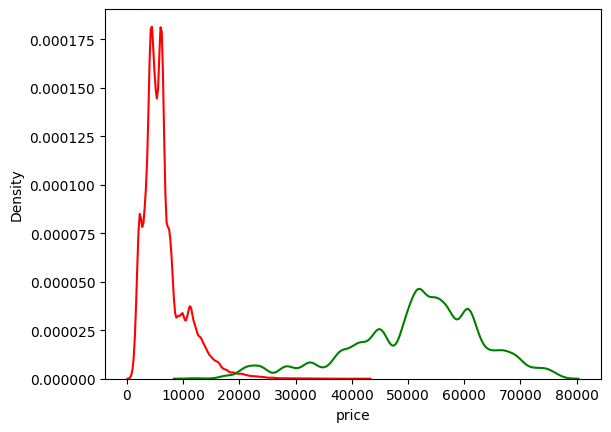

In [207]:
sns.distplot(economy_price, hist=False, color='red')
sns.distplot(business_price, hist=False, color='green')

Economy prices are skewed positively.

Transforming economy prices using the ```log()``` transformation to make it normally distributed

In [208]:
economy_price = economy_price.apply(lambda x:np.log1p(x))

If you look at business prices, you can see that there are more no. of values towards the left side, meaning it is negatively skewed.

```Boxcox``` or ```exp()``` transformations are good practice of transforming the negatively skewed data, but since the values are larger, when exp() applied, it would return NaN values, so I am applying Boxcox transformation

In [209]:
business_price, fitted_lambda = stats.boxcox(business_price)

<function matplotlib.pyplot.show(close=None, block=None)>

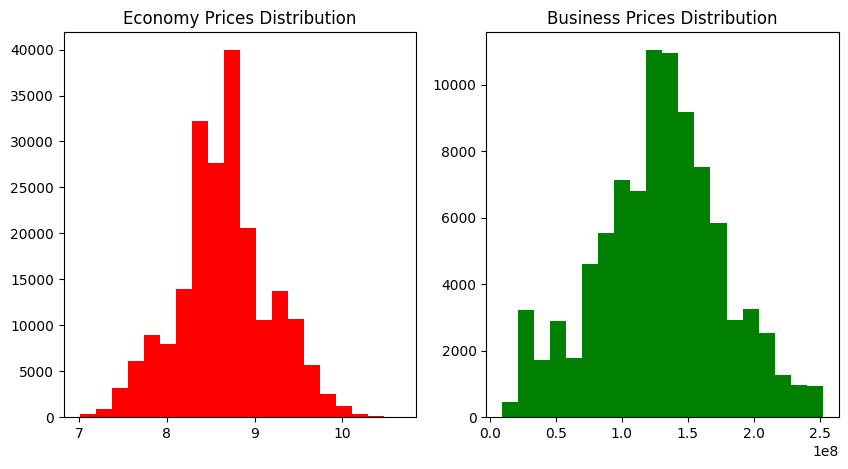

In [210]:
fig, (eco_plt,bus_plt) = plt.subplots(1, 2, figsize=(10,5))

eco_plt.hist(economy_price, color='red', bins=20)
bus_plt.hist(business_price, color='green', bins=20)
eco_plt.set(title='Economy Prices Distribution')
bus_plt.set(title='Business Prices Distribution')
plt.show

Now both the features are normalized

Since our hypothesis is to check if there is any difference in thier mean or not, we will get their mean values using ```mean()```

In [212]:
print(f"Economy mean price: {economy_price.mean()}\nBusiness mean price: {business_price.mean()}")

Economy mean price: 8.65075913807509
Business mean price: 128966716.41826184


Next, we will obtain our statistics, t-value and p-value. We will use ```scipy.stats``` library and ```ttest_ind()``` function to calculate these parameters.

Also I have taken significance level(alpha) to be ```5%```

In [213]:
alpha = 0.05
t_value, p_value = stats.ttest_ind(economy_price, business_price)
print(f"t-value: {t_value}\np-value: {p_value}")

t-value: -1226.9134380108699
p-value: 0.0


In [214]:
if p_value < alpha:
    print("Reject the null hypothesis, that is there is no difference between mean prices of economy and business")
else:
    print("Accept the null hypothesis, that is there is a difference between mean prices of economy and business")

Reject the null hypothesis, that is there is no difference between mean prices of economy and business


## Suggestions for the next steps in analyzing this data

* Formulate multiple hypothesis and perform different formal significance tests on it
* We can predict the prices of ticket by developing a machine learning model

## Summary

* The dataset was already pre-cleaned and there was no necessary to clean it.
* Performed some transformations in order to get the data normally distributed.
* visualized them through various graphs. 
* Formulated 3 possible hypothesis and performed a formal test on one of them
* The findings are discussed.

# Thank You!